In [15]:
# 读取文件

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

gearbox_initial = []
for i in range(5):
    gearbox_initial.append(pd.read_excel('原始数据.xlsx', i, dtype=np.float32).iloc[:,:5])
    gearbox_initial[i]['target'] = i




In [16]:
# pca进行降维，data为降维后的数据，list类型

pca = PCA(n_components='mle')
data = []
for train in gearbox_initial: 
    data.append(pca.fit_transform(train.iloc[:,:4]))


In [8]:
# 保存csv文件

# data[0] = pd.DataFrame(data[0], columns=['sensor1', 'sensor2', 'sensor3'])
# data[0]['target'] = 0
# data[0].to_csv('{}as.csv'.format(0))

tmp = pd.DataFrame()
for i in range(5):
    data[i] = pd.DataFrame(data[i], columns=['sensor1', 'sensor2', 'sensor3'])
    data[i]['target'] = i
    tmp = pd.concat([tmp, data[i]])
    # data[i].to_csv('{}as.csv'.format(i))



In [73]:
# 使用梯度提升树获得最佳深度（use_boosting_tree(X_train,y_train,X_test,y_test)）

from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from pylab import mpl

def use_boosting_tree(X_train,y_train,X_test,y_test):
    """
    使用梯度回升树，获得最佳深度
    :return:
    """
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    start_depth = 1
    n_depth = 20
    # for 循环查找最合适的决策树的深度
    best_depth = 1
    highest_score = 0
    train_s, test_s = [], []

    for i in range(start_depth, n_depth):
        tree = GradientBoostingClassifier(max_depth=i)
        tree.fit(X_train, y_train)
        train_score = tree.score(X_train, y_train)
        test_score = tree.score(X_test, y_test)

        train_s.append(train_score)
        test_s.append(test_score)

        best_depth = i if test_score > highest_score else best_depth
        highest_score = test_score if test_score > highest_score else highest_score
        print('深度为{}，测试准确率为{}'.format(i,test_score))

    plt.plot(range(1, n_depth-start_depth+1), train_s)
    plt.plot(range(1, n_depth-start_depth+1), test_s)

    plt.legend(['训练集准确度', '测试集准确度'])

    plt.xticks(range(start_depth-1, n_depth))
    plt.yticks(np.linspace(0, 1, 11))

    plt.title('梯度回升树不同复杂度准确情况')
    plt.savefig('梯度回升树不同复杂度准确情况.png', dpi=1000)
    plt.show()
    print('最佳深度为：{}'.format(best_depth))
    print('最好成绩为；{}'.format(highest_score))

深度为1，测试准确率为0.5190204081632653
深度为2，测试准确率为0.5651428571428572
深度为3，测试准确率为0.6277551020408163
深度为4，测试准确率为0.6705034013605442
深度为5，测试准确率为0.7201904761904762
深度为6，测试准确率为0.7520272108843538
深度为7，测试准确率为0.7779863945578231
深度为8，测试准确率为0.7992380952380952
深度为9，测试准确率为0.814421768707483
深度为10，测试准确率为0.8271564625850341
深度为11，测试准确率为0.8350204081632653
深度为12，测试准确率为0.8375238095238096
深度为13，测试准确率为0.8407346938775511
深度为14，测试准确率为0.8420136054421768
深度为15，测试准确率为0.8428027210884353
深度为16，测试准确率为0.8422857142857143
深度为17，测试准确率为0.8433197278911565
深度为18，测试准确率为0.8452517006802721
深度为19，测试准确率为0.8439455782312926


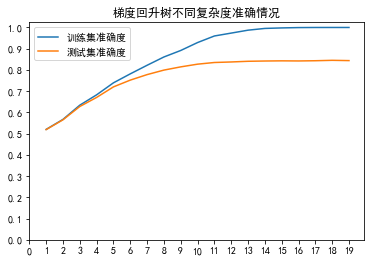

最佳深度为：18
最好成绩为；0.8452517006802721


In [74]:
# 运行上方自定函数，得到最佳深度

from sklearn.model_selection import train_test_split

data = np.array(tmp)
X_train, X_test, y_train, y_test = train_test_split(tmp.iloc[:,:3], tmp.iloc[:,3], train_size=0.75)

use_boosting_tree(X_train,y_train,X_test,y_test)
"""
最佳深度为：18
最好成绩为；0.8452517006802721
"""

In [25]:
# 读取降维后数据
from sklearn import tree
import numpy as np
from sklearn.tree import export_graphviz
import pandas as pd
# temp = pd.read_excel('as.xlsx', 0, dtype=np.float32).iloc[:20,1:]
temp = pd.DataFrame()
for i in range(5):
    temp = pd.concat([temp,pd.read_excel('pca降维后有效数据.xlsx', i, dtype=np.float32).iloc[:,1:]])

feature_names = ['sensor1', 'sensor2', 'sensor3']


In [ ]:
# 决策树可视化

X_temp= np.array(temp.iloc[:,:-1])
y_temp = np.array(temp.iloc[:,-1])

gbdt = GradientBoostingClassifier(max_depth=10)
gbdt.fit(X_temp, y_temp)
# export_graphviz(tree,out_file='tree.dot',feature_names=feature_names,
#                 class_names=['0', '1', '2', '3', '4'], filled=True)

plt.figure(figsize=(15,8),dpi=1000)
_ = tree.plot_tree(gbdt[0,0],filled = True)
plt.savefig('决策树可视化.jpg')

In [7]:
# 模型训练

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

feature_names = ['sensor1', 'sensor2', 'sensor3']

X_train, X_test, y_train, y_test = train_test_split(temp.iloc[:,:3], temp.iloc[:,3], train_size=0.75)

gbdt = GradientBoostingClassifier(max_depth=10)
gbdt.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=10)

In [ ]:
# 权重图

plt.barh(range(len(feature_names)), gbdt.feature_importances_, align='center')
plt.yticks(np.arange(len(feature_names)),feature_names)
plt.xlabel('特征重要性')
plt.ylabel('特征')

plt.title('梯度提升树最佳深度特征重要性')
# plt.savefig('梯度提升树最佳深度特征重要性.jpg',dpi = 200, bbox_inches = 'tight')
plt.show()

In [12]:
# 基于以上训练完的模型，进行模型评估
from sklearn.metrics import classification_report

print(classification_report(y_test,gbdt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7434
           1       0.76      0.76      0.76      7294
           2       0.85      0.85      0.85      7374
           3       0.86      0.83      0.84      7388
           4       0.77      0.75      0.76      7260

    accuracy                           0.81     36750
   macro avg       0.81      0.81      0.81     36750
weighted avg       0.81      0.81      0.81     36750



<AxesSubplot:>

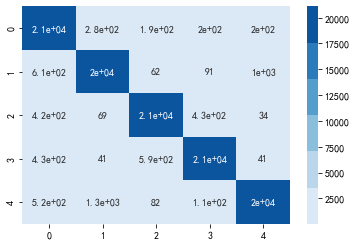

In [14]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train,gbdt.predict(X_train))
sns.heatmap(cm,cmap = sns.color_palette("Blues"),annot = True)

In [8]:
# 第四题预测部分,读取数据

predict_data = pd.read_excel('附件2.xls', sheet_name=None)

In [39]:
# 降维，预测，统计
import collections

statistical_data = {}
result = {}
for key, test_data in predict_data.items():
    # 去除掉No列
    test_data = test_data.iloc[:, 1:5]
    # 使用前面训练好的pca算法进行降维
    test_data = pd.DataFrame(pca.transform(test_data),columns=feature_names)

    # 进行预测
    temp_predict = gbdt.predict(test_data)

    # 统计各元素出现的个数
    data_count=collections.Counter(temp_predict)
    statistical_data[key] = data_count
    print(data_count)

    # 获得出现频率最高的
    (val, type_of_failure) = max(zip(data_count.values(),data_count.keys()))
    result[key] = type_of_failure


Counter({0.0: 393, 4.0: 382, 1.0: 160, 3.0: 36, 2.0: 29})
Counter({0.0: 389, 4.0: 366, 1.0: 203, 3.0: 23, 2.0: 19})
Counter({4.0: 415, 0.0: 276, 1.0: 202, 3.0: 65, 2.0: 42})
Counter({4.0: 482, 0.0: 223, 1.0: 185, 3.0: 70, 2.0: 40})
Counter({0.0: 386, 4.0: 377, 1.0: 180, 3.0: 34, 2.0: 23})
Counter({4.0: 411, 0.0: 354, 1.0: 148, 3.0: 53, 2.0: 34})
Counter({4.0: 509, 1.0: 317, 0.0: 135, 3.0: 25, 2.0: 14})
Counter({4.0: 746, 1.0: 159, 3.0: 43, 0.0: 38, 2.0: 14})
Counter({0.0: 437, 4.0: 371, 1.0: 164, 3.0: 14, 2.0: 14})
Counter({0.0: 445, 4.0: 374, 1.0: 142, 3.0: 27, 2.0: 12})
Counter({4.0: 734, 1.0: 175, 0.0: 41, 3.0: 33, 2.0: 17})
Counter({4.0: 487, 0.0: 282, 1.0: 163, 3.0: 44, 2.0: 24})


In [45]:
temp_predict = gbdt.predict(temp.iloc[29400*4:29400*4+500,:3])
data_count2=collections.Counter(temp_predict)
print(data_count2)

Counter({0.0: 467, 1.0: 14, 4.0: 11, 2.0: 4, 3.0: 4})
